# StyleGAN2Ada Experiments

From:

- https://github.com/NVlabs/stylegan2-ada-pytorch


In [8]:
!~\AppData\Local\Programs\Python\Python39\python.exe ./../train.py --outdir=./data/output --data=./data/256image --subset 1 --gpus=1

The system cannot find the path specified.


In [2]:
# !cd ../latent-stylegan2-ada-pytorch
# # !git pull
# !python ./train.py --outdir=/data/imagefolder/stylegan2/output/2 --data=/data/ffhq/images256x256 --subset 100 --gpus=4

Already up to date.


In [2]:
# import numpy as np
# arr = np.array([1,2,3,4])

# np.expand_dims(arr, 0)

array([[1, 2, 3, 4]])

In [2]:
!ls -l /data/imagefolder/stylegan2/output/3/00000-images256x256-subset10000-auto4

total 2080
-rw-rw-r-- 1 will will 543096 Jul 11 21:41 events.out.tfevents.1657559669.104-171-200-188.1292612.0
-rw-rw-r-- 1 will will  37725 Jul 11 17:14 fakes000000.png
-rw-rw-r-- 1 will will  62554 Jul 11 17:48 fakes000201.png
-rw-rw-r-- 1 will will  42953 Jul 11 18:21 fakes000403.png
-rw-rw-r-- 1 will will  44653 Jul 11 18:54 fakes000604.png
-rw-rw-r-- 1 will will  42957 Jul 11 19:28 fakes000806.png
-rw-rw-r-- 1 will will  40840 Jul 11 20:01 fakes001008.png
-rw-rw-r-- 1 will will  41137 Jul 11 20:34 fakes001209.png
-rw-rw-r-- 1 will will  40303 Jul 11 21:08 fakes001411.png
-rw-rw-r-- 1 will will  40324 Jul 11 21:41 fakes001612.png
-rw-rw-r-- 1 will will  37035 Jul 11 17:14 fakes_init.png
-rw-rw-r-- 1 will will  65394 Jul 11 21:42 log.txt
-rw-rw-r-- 1 will will 795011 Jul 11 21:42 stats.jsonl
-rw-rw-r-- 1 will will   1973 Jul 11 17:13 training_options.json


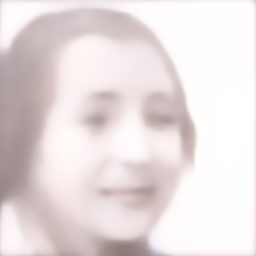

In [3]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/3/00000-images256x256-subset10000-auto4/fakes001612.png'

Image.open(path)

In [7]:
import numpy as np

arr = np.asarray(Image.open(path))
print(arr[0].max(), arr[0].min())

246 196
